In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
import seaborn as sns
import warnings                  
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px

In [2]:
stock_data = pd.read_csv('D:\DA\Technocolabs Intern\Final Project\S&P500 Stocks\snp500stocksmerged.csv')

In [3]:
stock_data.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [4]:
stock_data['date'] = stock_data['date'].apply(pd.to_datetime)
stock_data.head()

date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [5]:
stock_data['date_year'] = pd.to_datetime(stock_data['date'],format="%Y-%m-%d").dt.year
stock_data['date_month'] = pd.to_datetime(stock_data['date'],format="%Y-%m-%d").dt.month
stock_data['date_day'] = pd.to_datetime(stock_data['date'],format="%Y-%m-%d").dt.day
stock_data.head()

date   open   high    low  close    volume Name  date_year  \
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL       2013   
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL       2013   
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL       2013   
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL       2013   
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL       2013   

   date_month  date_day  
0           2         8  
1           2        11  
2           2        12  
3           2        13  
4           2        14

# EDA

<AxesSubplot:xlabel='date_year'>

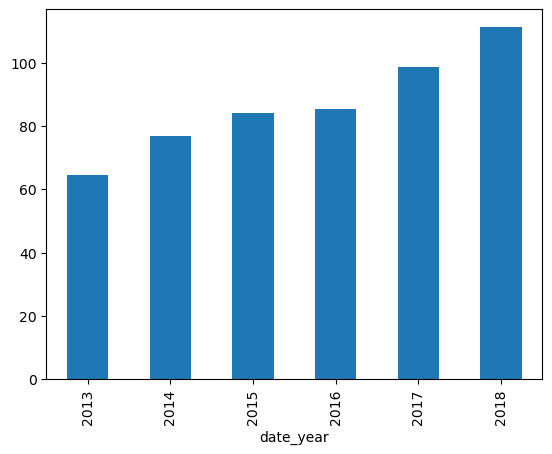

In [6]:
stock_data.groupby('date_year')['close'].mean().plot.bar()

In [9]:
#stock_data.plot(subplots=True)
#plt.show()

In [13]:
#stock_data.groupby('date')['close'].mean().plot.bar()

Text(0, 0.5, 'Frequency')

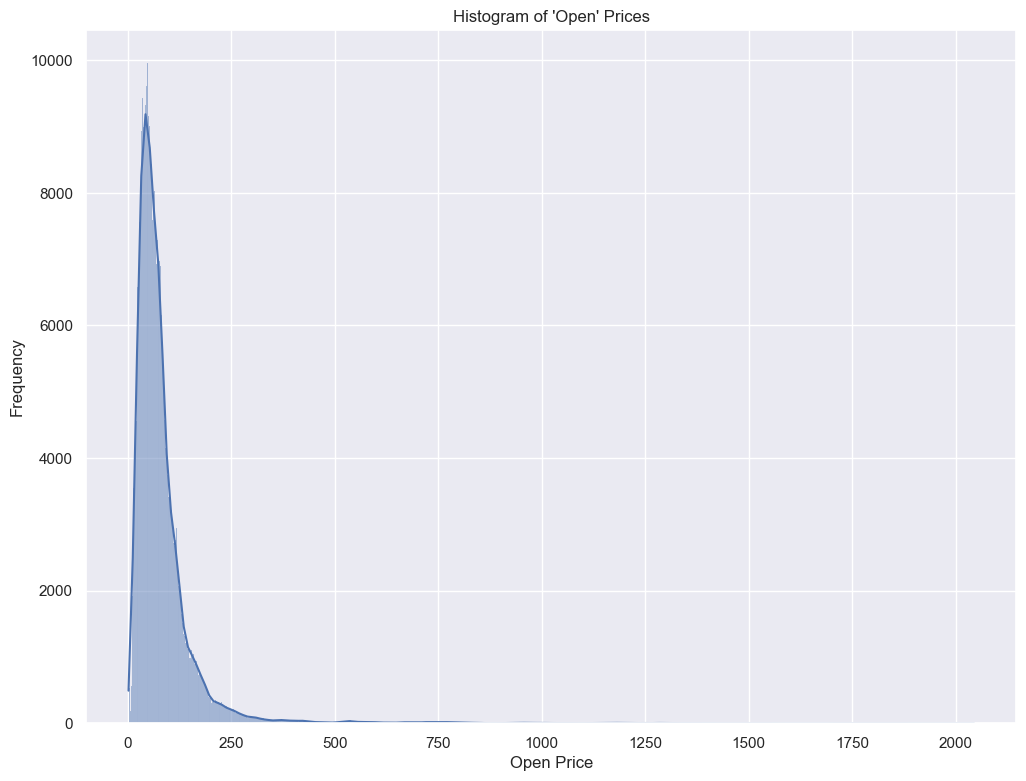

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(data=stock_data, x='open', kde=True)
plt.title("Histogram of 'Open' Prices")
plt.xlabel("Open Price")
plt.ylabel("Frequency")

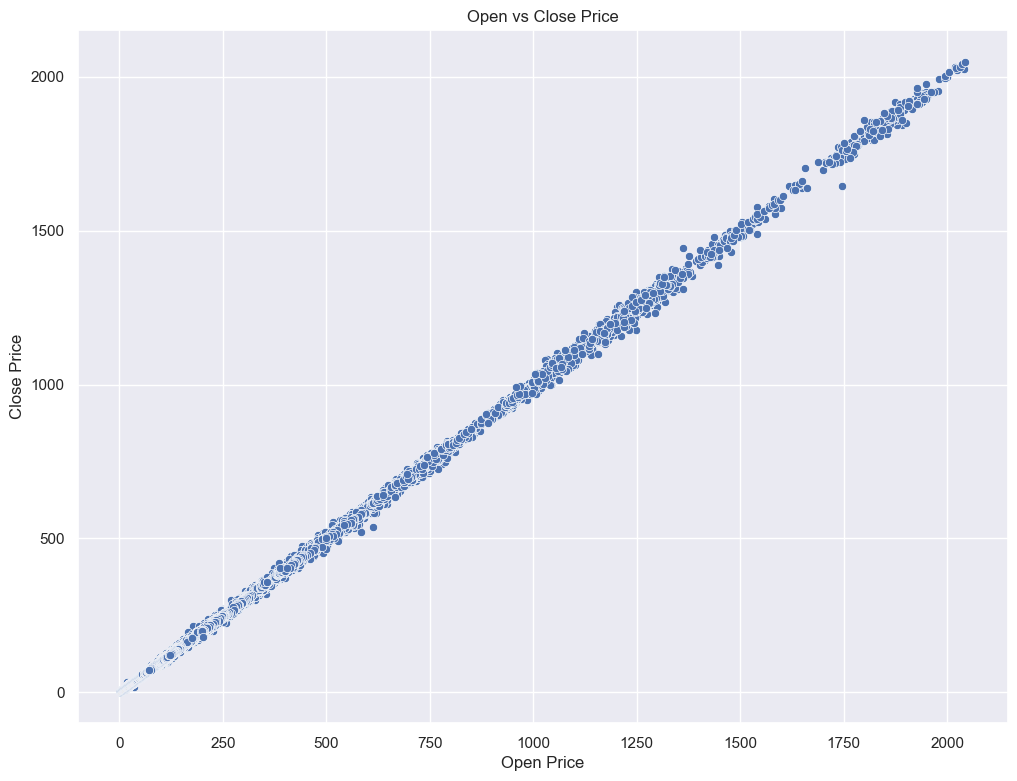

In [10]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='open', y='close', data=stock_data)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')
plt.show()

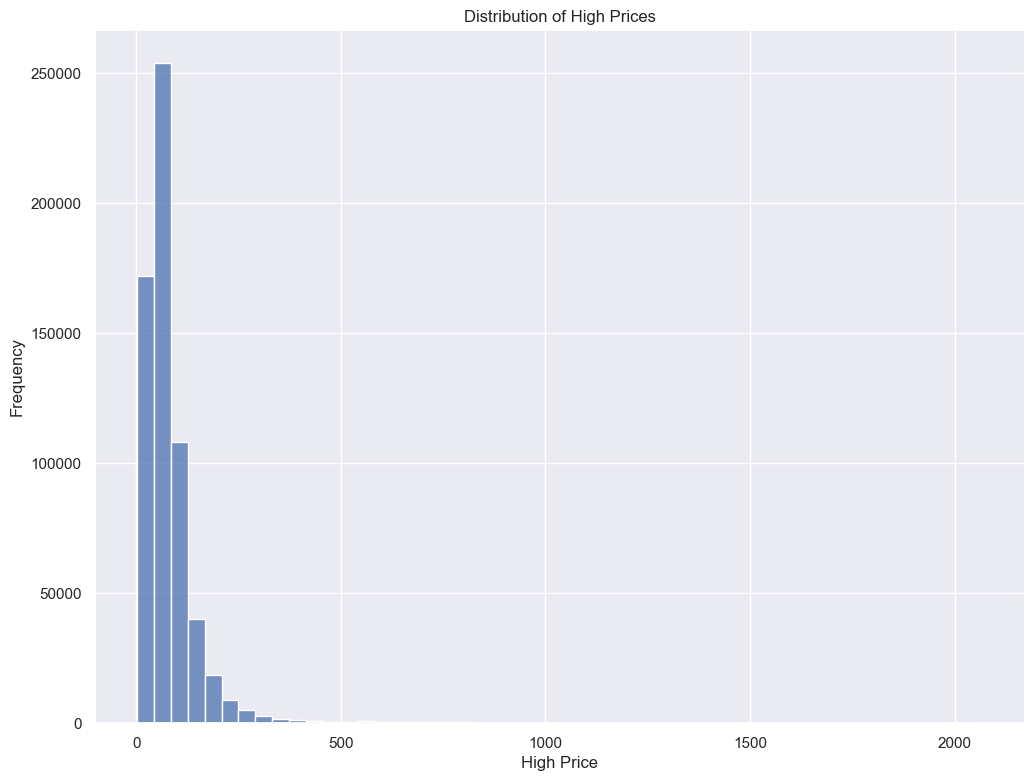

In [11]:
plt.figure(figsize=(12,9))
sns.histplot(data=stock_data['high'], bins=50)
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Distribution of High Prices')
plt.show()

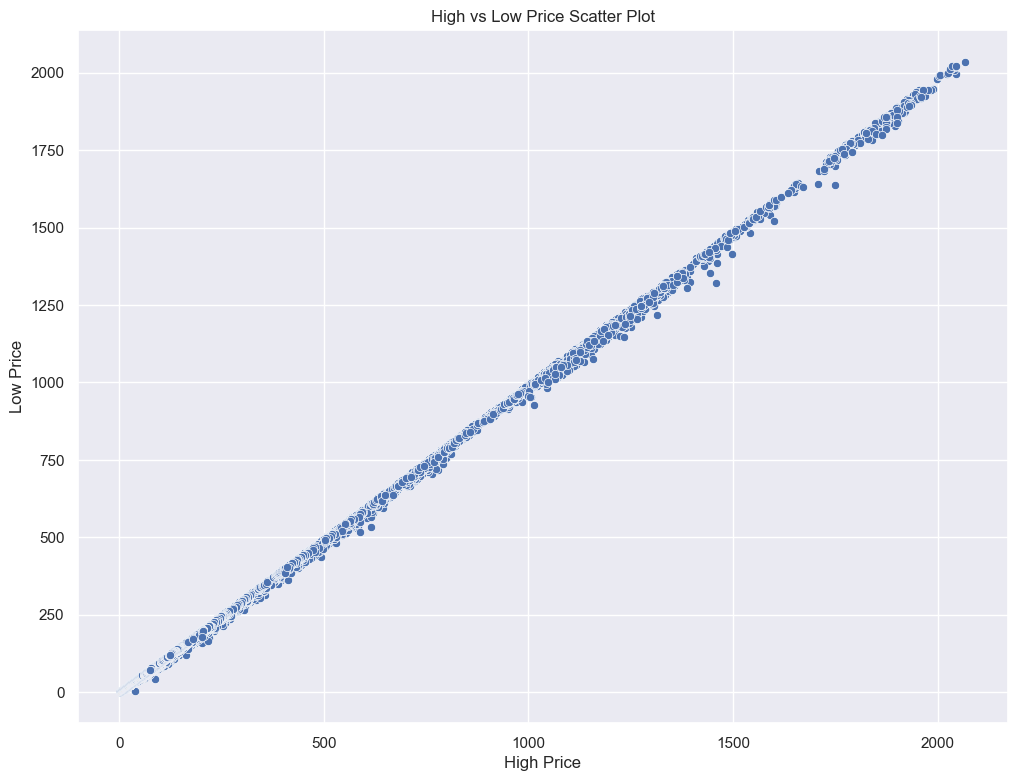

In [12]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='high', y='low', data=stock_data)
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.title('High vs Low Price Scatter Plot')
plt.show()

In [13]:
names = stock_data.groupby('Name')

In [14]:
names.groups.keys()

dict_keys(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBOE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',

In [15]:
AAPL = names.get_group('AAPL')
AMZN = names.get_group('AMZN')
MSFT = names.get_group('MSFT')
FB = names.get_group('FB')

In [16]:
AAPL.set_index("date", inplace=True)

In [17]:
AAPL.head()

open     high      low    close     volume  Name  date_year  \
date                                                                         
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       2013   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       2013   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       2013   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       2013   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       2013   

            date_month  date_day  
date                              
2013-02-08           2         8  
2013-02-11           2        11  
2013-02-12           2        12  
2013-02-13           2        13  
2013-02-14           2        14

<AxesSubplot:xlabel='date_year'>

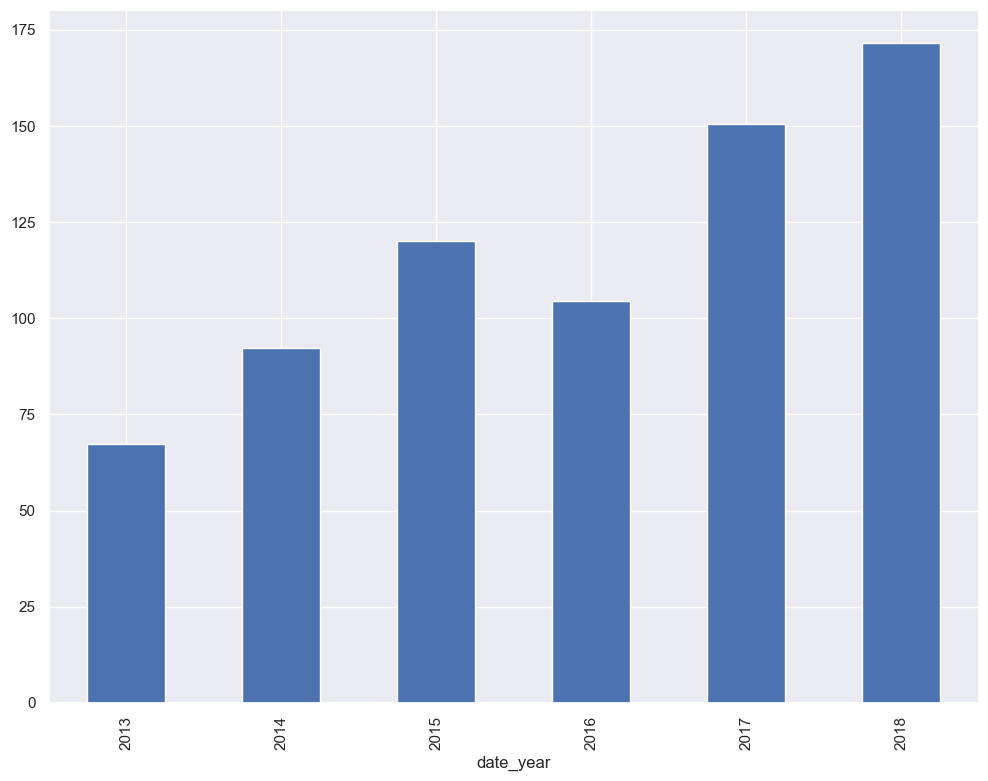

In [18]:
AAPL.groupby('date_year')['close'].mean().plot.bar()

<AxesSubplot:xlabel='date_year'>

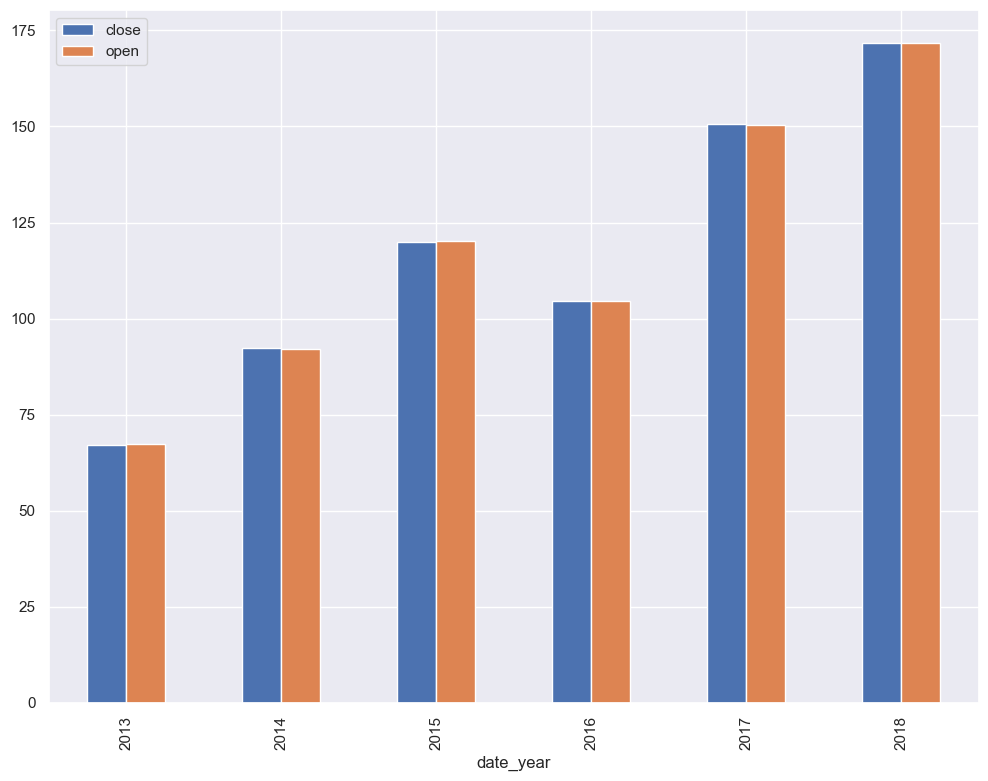

In [19]:
AAPL.groupby('date_year')['close', 'open'].mean().plot.bar()

<AxesSubplot:xlabel='date_month'>

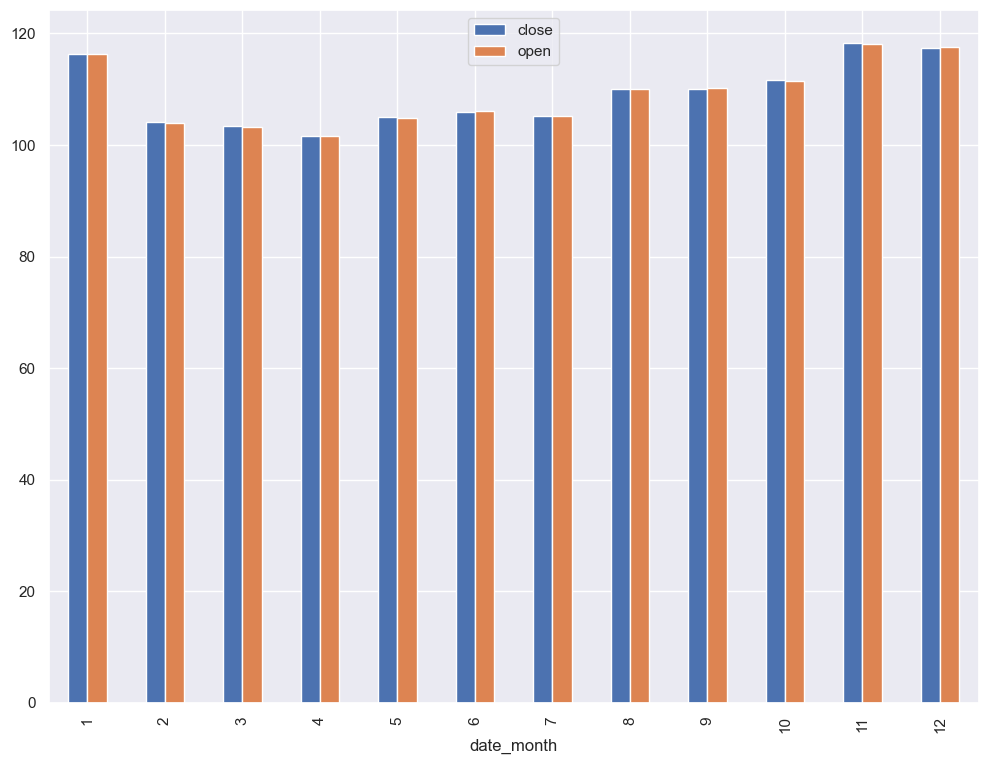

In [20]:
AAPL.groupby('date_month')['close', 'open'].mean().plot.bar()

In [21]:
#tickers = ['AAPL', 'AMZN', 'MSFT', 'FB']
#big_stocks = pd.concat([AAPL, AMZN, MSFT, FB], axis=1, keys=tickers)

In [22]:
#big_stocks

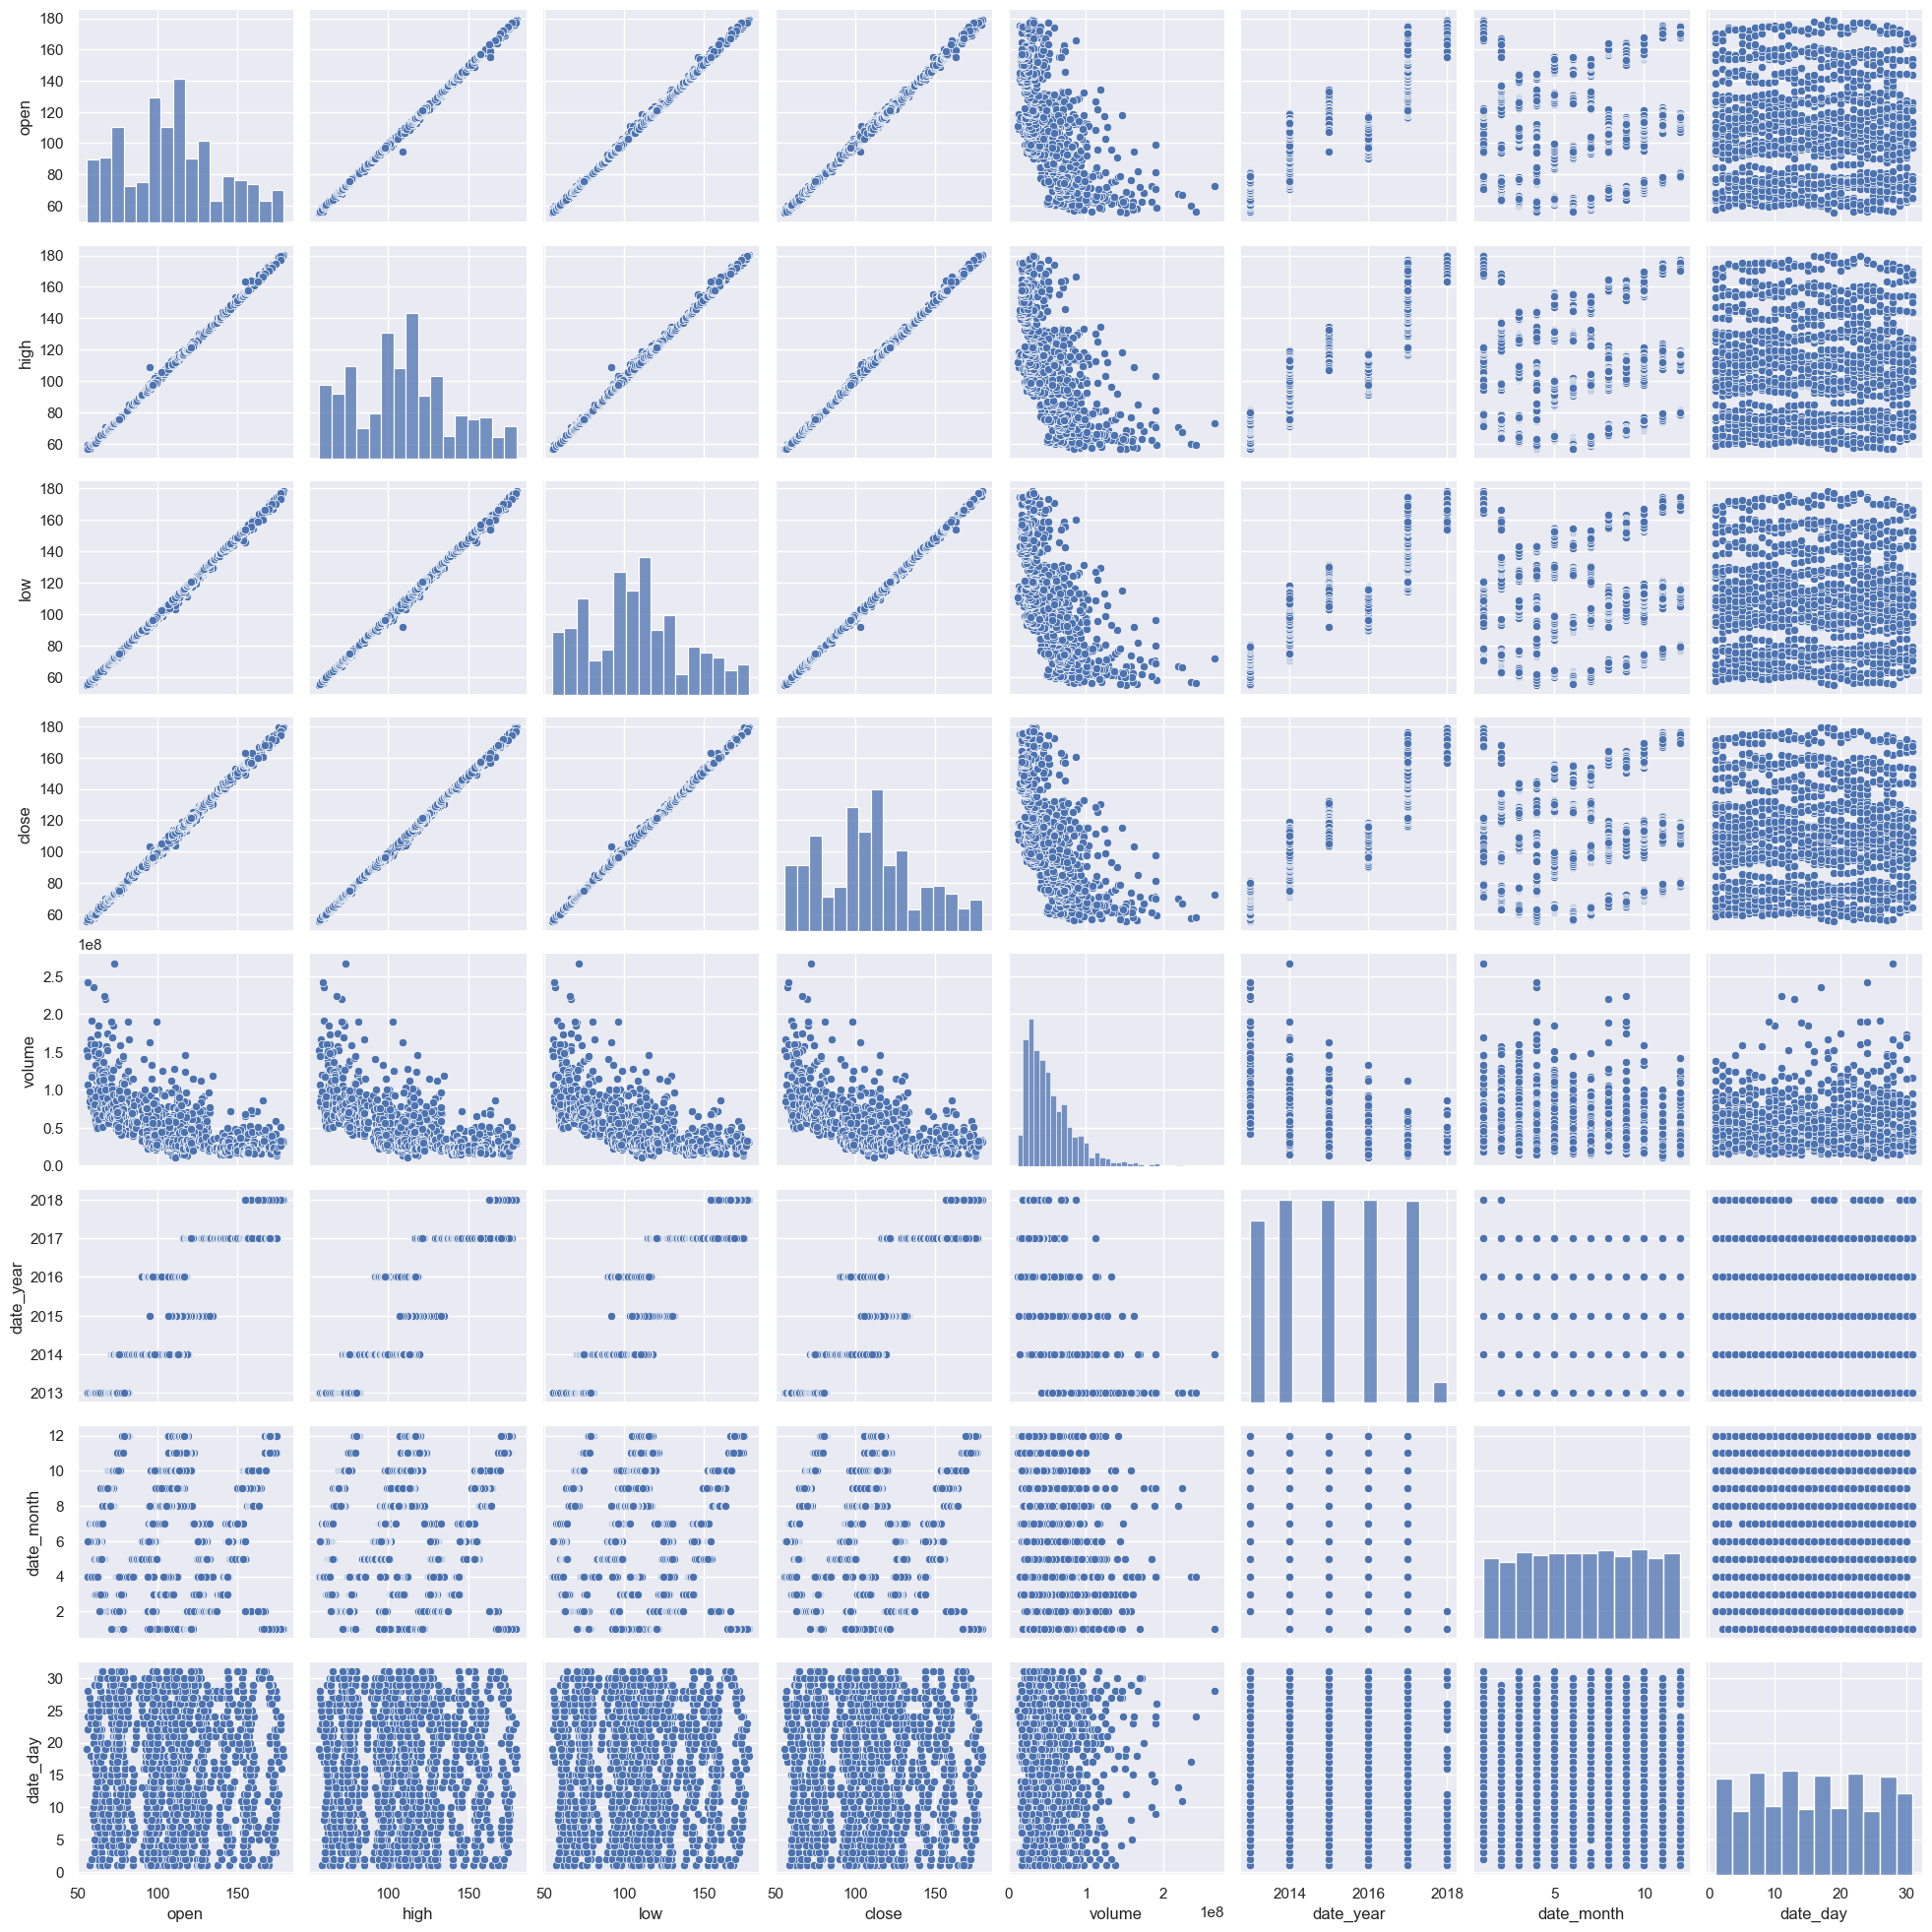

In [23]:
sns.pairplot(AAPL)

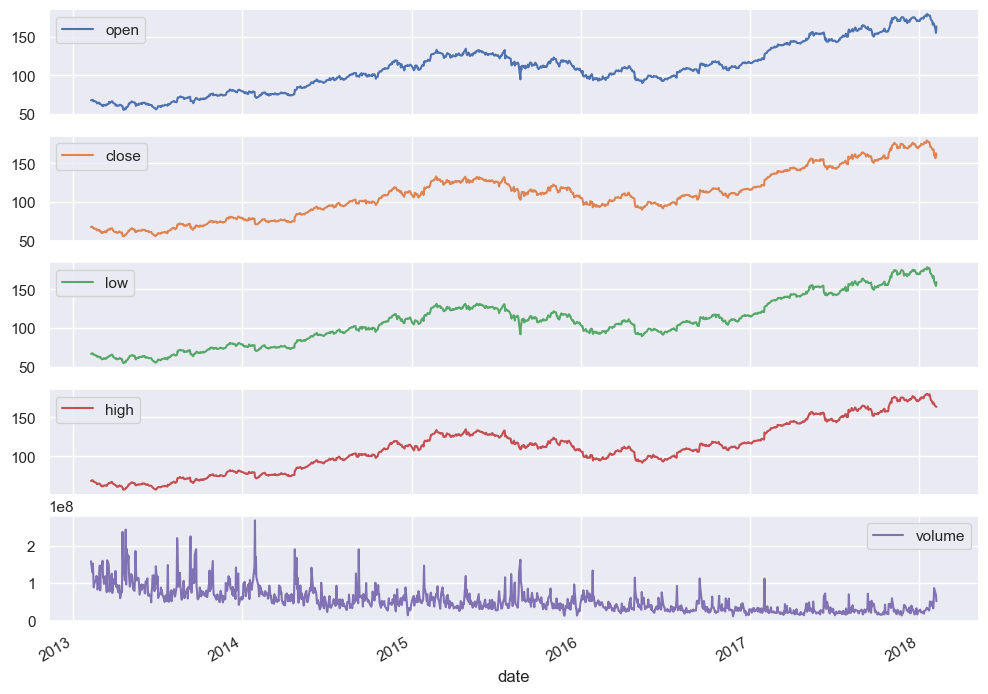

In [24]:
AAPL[['open', 'close', 'low', 'high','volume']].plot(subplots=True)
plt.show()

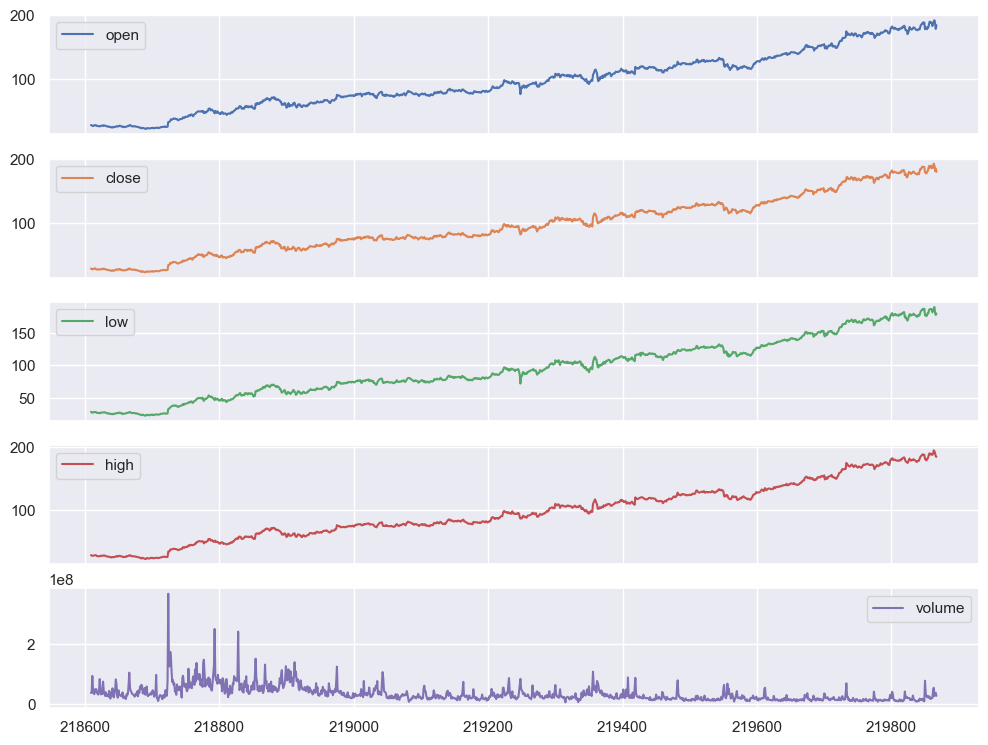

In [25]:
FB[['open', 'close', 'low', 'high','volume']].plot(subplots=True)
plt.show()

<AxesSubplot:>

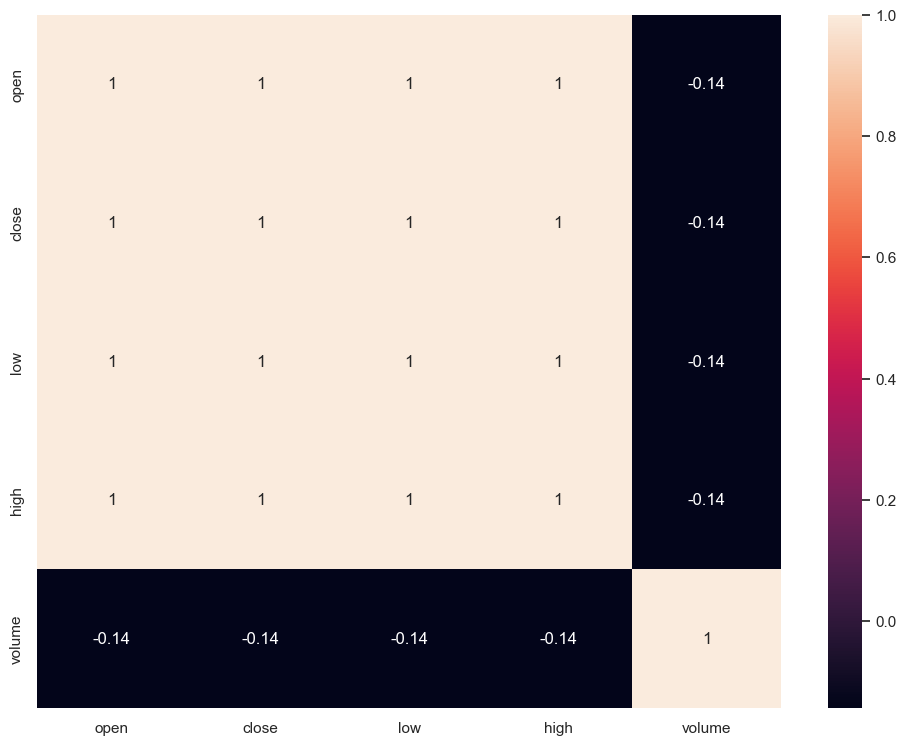

In [26]:
corr = stock_data[['open', 'close', 'low', 'high','volume']].corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

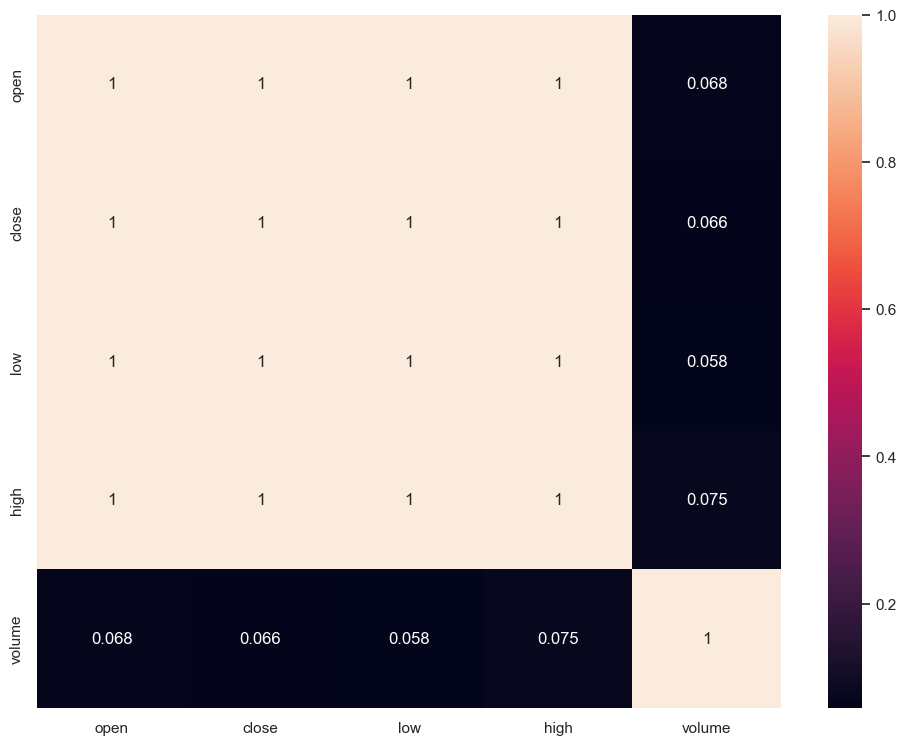

In [27]:
corr_amzn = AMZN[['open', 'close', 'low', 'high','volume']].corr()
sns.heatmap(corr_amzn, annot=True)

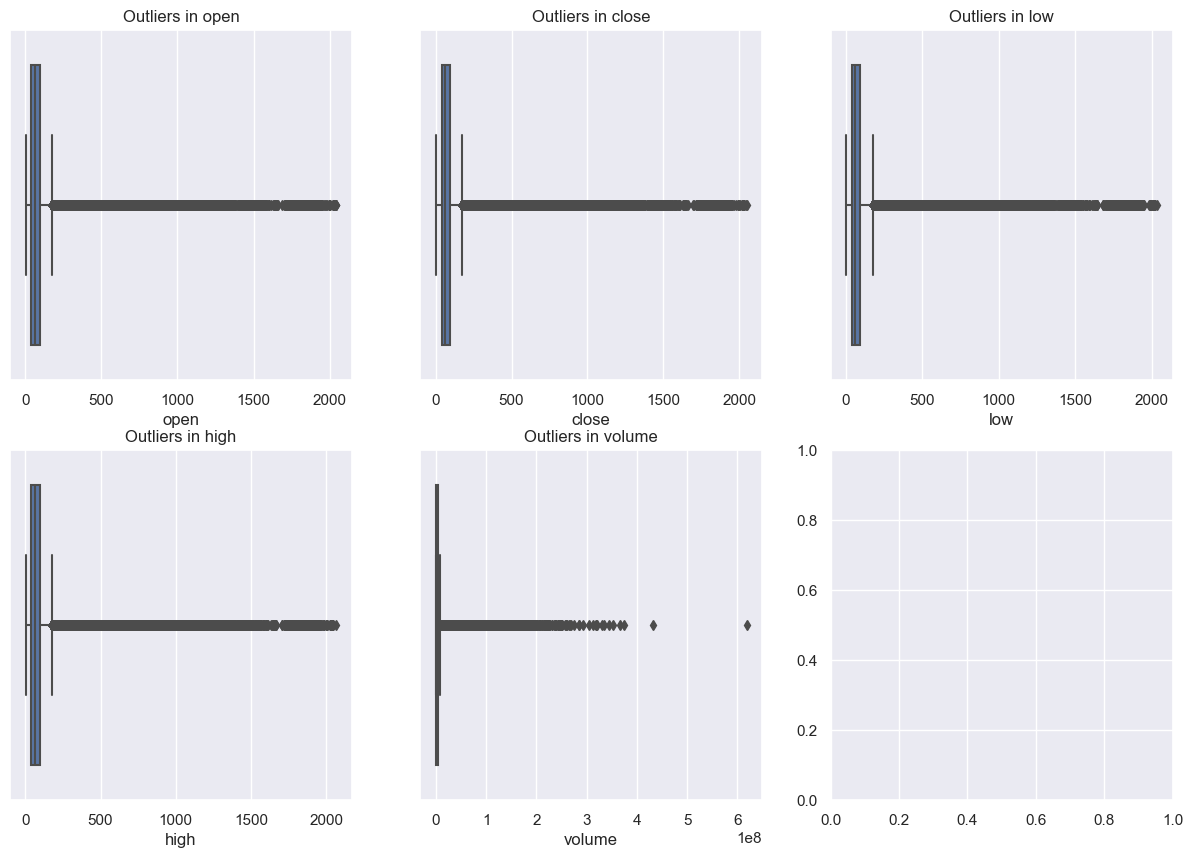

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
counter = 0
data_without_name = stock_data[['open', 'close', 'low', 'high','volume']]
for column in data_without_name.columns:
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(data_without_name[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1
plt.show()

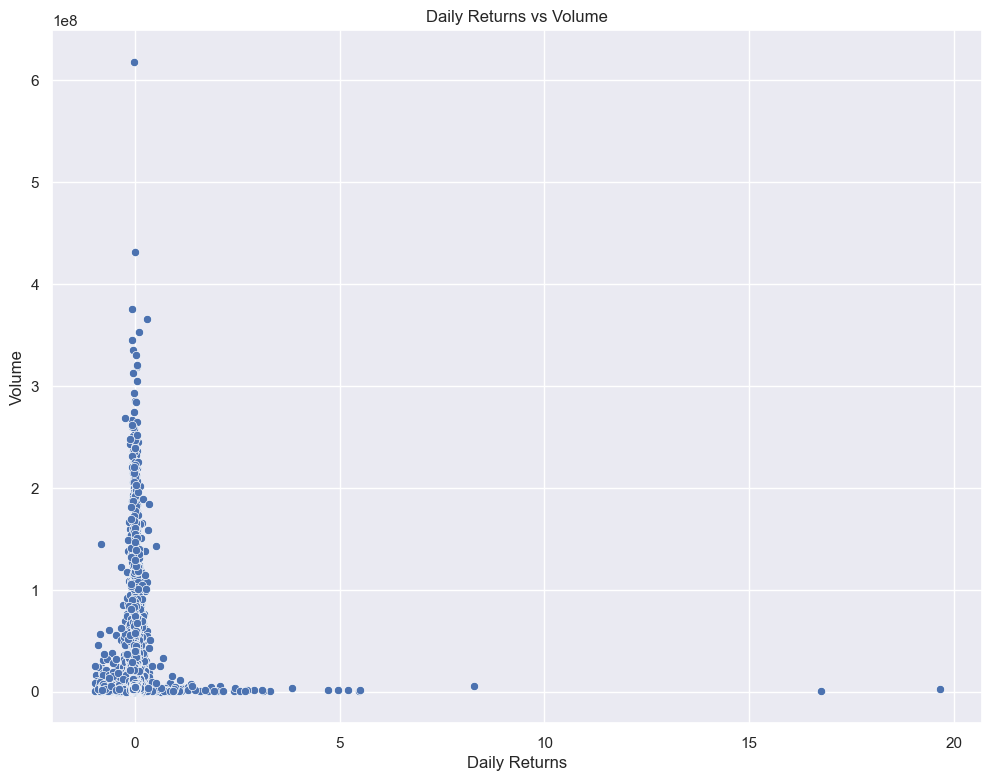

In [41]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='returns', y='volume', data=stock_data)
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.title('Daily Returns vs Volume')
plt.show()

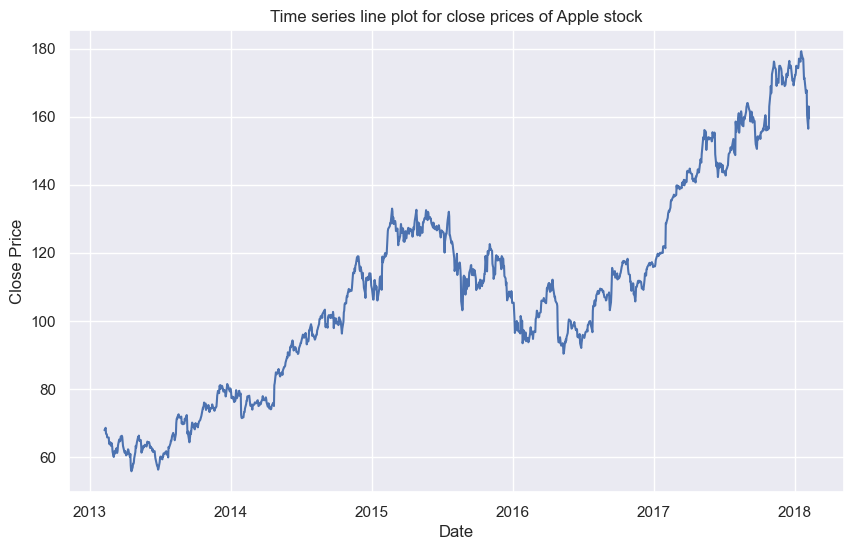

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='close', data=AAPL)
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.title('Time series line plot for close prices of Apple stock')

plt.show()

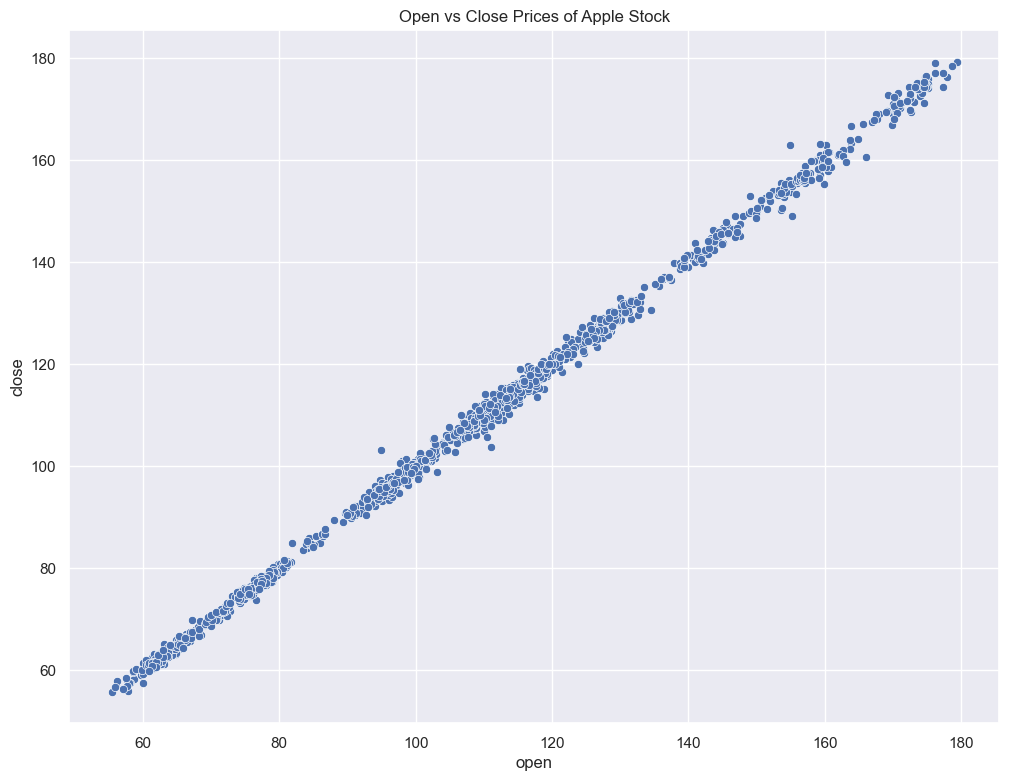

In [43]:
sns.scatterplot(data=AAPL, x='open', y='close')
plt.title('Open vs Close Prices of Apple Stock')
plt.show()

# Feature engineering

In [30]:
stock_data['price_change'] = stock_data['close'] - stock_data['open'] #change is price

In [31]:
stock_data['returns'] = stock_data['close'].pct_change() #%age of return

In [32]:
stock_data['average_price'] = (stock_data['close'] + stock_data['open']) / 2 #avg price

In [36]:
stock_data['price_range'] = stock_data['high'] - stock_data['low'] #price_range

In [37]:
stock_data['volume_change'] = stock_data['volume'].diff() #volume_change

In [38]:
stock_data['price_volume_correlation'] = stock_data['close'].corr(stock_data['volume']) #price_volume_correlation

In [39]:
stock_data.head()

date   open   high    low  close    volume Name  date_year  \
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL       2013   
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL       2013   
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL       2013   
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL       2013   
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL       2013   

   date_month  date_day  price_change   returns  average_price  price_range  \
0           2         8         -0.32       NaN         14.910         0.49   
1           2        11         -0.43 -0.019661         14.675         0.75   
2           2        12         -0.18 -0.013140         14.360         0.41   
3           2        13          0.36  0.027330         14.480         0.69   
4           2        14         -0.95 -0.045703         14.465         1.80   

   volume_change  price_volume_correlation  
0            NaN                 -0.142802  
1       474500.0                 -0.142802  
2      -756000.0                 -0.142802  
3      2133500.0                 -0.142802  
4     21620400.0                 -0.142802

In [ ]:
stock_data.set_index("date", inplace=True)

In [45]:
fig0 = px.scatter(AAPL, x='open', y='close', title='Open vs Close Prices of Apple Stock')
fig0.show()

In [73]:
fig3 = go.Figure(data=[go.Surface(z=AAPL[['open', 'high', 'low']].values)])
fig3.update_layout(title='3D Surface Plot for Apple Stock',scene = dict(
                    xaxis_title='Open',
                    yaxis_title='High',
                    zaxis_title='Low'))
fig3.show()

In [81]:
stock_data

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [44]:
stock_names = ['AAPL', 'GOOG', 'AMZN',"MSFT","FB"]

fig8 = go.Figure()
for stock_name in stock_names:
    stocks = stock_data[stock_data['Name'] == stock_name]
    fig8.add_trace(go.Scatter(x=stocks['date'], y=stocks['close'], name=stock_name))

fig8.update_layout(title='Close Prices of Multiple Stocks Over Time', xaxis_title='Date', yaxis_title='Close Price')
fig8.show()